In [0]:
import numpy as np
import argparse
import cv2

In [0]:
# load the image from disk
image = cv2.imread("/content/skew-5.jpg")

In [0]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
# threshold the image, setting all foreground pixels to
# 255 and all background pixels to 0
thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

In [0]:
coords = np.column_stack(np.where(thresh > 0))
angle = cv2.minAreaRect(coords)[-1]
if angle < -45:
	angle = -(90 + angle)

else:
	angle = -angle

In [0]:
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(image, M, (w, h),
	flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

[INFO] angle: -6.220


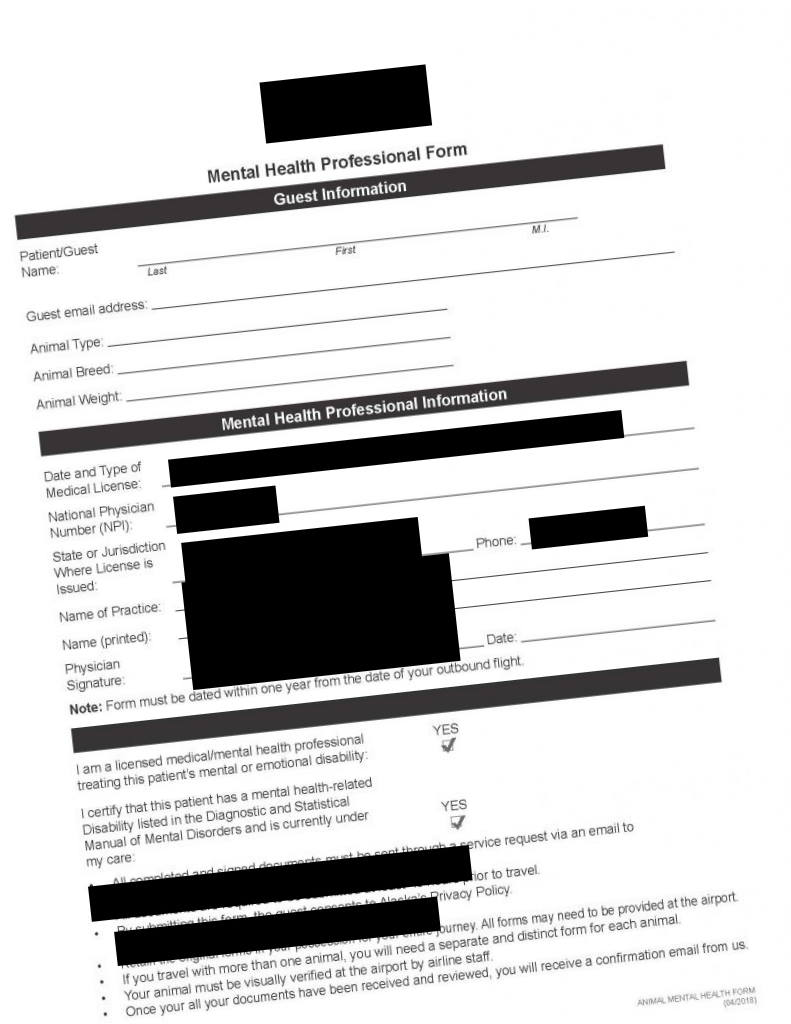

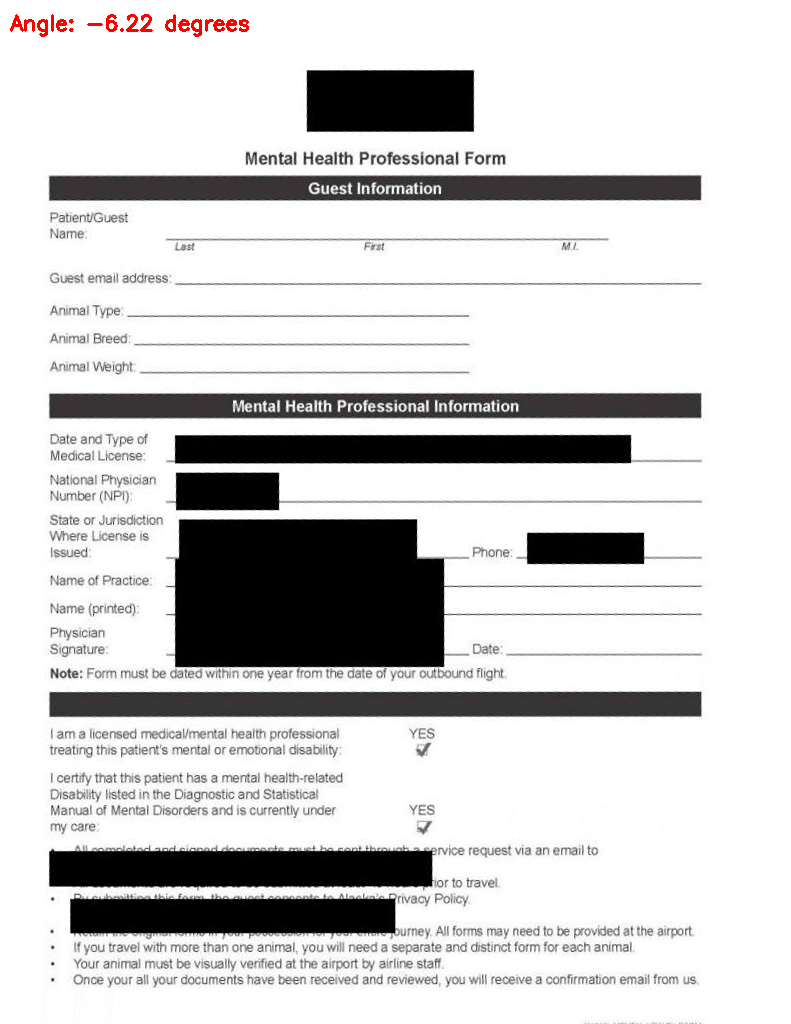

-1

In [33]:
cv2.putText(rotated, "Angle: {:.2f} degrees".format(angle),
	(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
print("[INFO] angle: {:.3f}".format(angle))
from google.colab.patches import cv2_imshow
cv2_imshow( image)
cv2_imshow(rotated)
cv2.waitKey(0)

In [34]:
cv2.imwrite("/content/watermark-1.jpg", rotated)

True